In [46]:
import pandas as pd
import numpy as np
import spacy

from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv('/content/snopes_phase1_clean_2018_7_3.csv')

In [20]:
df.head()

,fact_rating_phase1,snopes_url_phase1,article_title_phase1,article_category_phase1,article_date_phase1,article_claim_phase1,article_origin_url_phase1,index_paragraph_phase1,page_is_first_citation_phase1
0,true,https://www.snopes.com/fact-check/lori-mcallen...,Did an Oregon Department of Transportation Emp...,Viral Phenomena Viral Phenomena,21 June 2018,"In June 2018, Oregon DOT employee Lori McAllen...",https://www.oregon.gov/odot/Pages/index.aspx,1,True
1,true,https://www.snopes.com/fact-check/lori-mcallen...,Did an Oregon Department of Transportation Emp...,Viral Phenomena Viral Phenomena,21 June 2018,"In June 2018, Oregon DOT employee Lori McAllen...",http://archive.is/HpML7,2,False
2,true,https://www.snopes.com/fact-check/lori-mcallen...,Did an Oregon Department of Transportation Emp...,Viral Phenomena Viral Phenomena,21 June 2018,"In June 2018, Oregon DOT employee Lori McAllen...",https://us-east-1.tchyn.io/snopes-production/u...,4,False
3,true,https://www.snopes.com/fact-check/lori-mcallen...,Did an Oregon Department of Transportation Emp...,Viral Phenomena Viral Phenomena,21 June 2018,"In June 2018, Oregon DOT employee Lori McAllen...",https://us-east-1.tchyn.io/snopes-production/u...,10,False
4,true,https://www.snopes.com/fact-check/lori-mcallen...,Did an Oregon Department of Transportation Emp...,Viral Phenomena Viral Phenomena,21 June 2018,"In June 2018, Oregon DOT employee Lori McAllen...",https://us-east-1.tchyn.io/snopes-production/u...,12,False


In [35]:
df['fact_rating_phase1'].unique()

array(['true', 'mostly true', 'mixture', 'mostly false', 'false',
       'unproven', 'outdated', 'miscaptioned', 'correct attribution',
       'misattributed', 'scam', 'legend'], dtype=object)

In [19]:
df.iloc[0].article_category_phase1

'Viral Phenomena  Viral Phenomena'

In [13]:
df.iloc[0].article_claim_phase1


'In June 2018, Oregon DOT employee Lori McAllen said immigrants into the United States should be shot at the border with Mexico.'

In [15]:
print(df.columns)

Index(['fact_rating_phase1', 'snopes_url_phase1', 'article_title_phase1',
       'article_category_phase1', 'article_date_phase1',
       'article_claim_phase1', 'article_origin_url_phase1',
       'index_paragraph_phase1', 'page_is_first_citation_phase1'],
      dtype='object')


In [ ]:
df.drop(['snopes_url_phase1', 'article_title_phase1', 'article_category_phase1', 
         'article_date_phase1', 'article_origin_url_phase1', 'index_paragraph_phase1', 
         'page_is_first_citation_phase1'], inplace=True, axis=1)

In [25]:
df.head()

,fact_rating_phase1,article_claim_phase1
0,true,"In June 2018, Oregon DOT employee Lori McAllen..."
1,true,"In June 2018, Oregon DOT employee Lori McAllen..."
2,true,"In June 2018, Oregon DOT employee Lori McAllen..."
3,true,"In June 2018, Oregon DOT employee Lori McAllen..."
4,true,"In June 2018, Oregon DOT employee Lori McAllen..."


In [32]:
df['article_claim_phase1'].nunique()

5638

In [33]:
unique_df = df.drop_duplicates(subset='article_claim_phase1')

In [34]:
unique_df

,fact_rating_phase1,article_claim_phase1
0,true,"In June 2018, Oregon DOT employee Lori McAllen..."
6,true,The Trump administration is paying Southwest K...
20,true,"First Lady Melania Trump wore a jacket with ""I..."
37,true,Facebook posts by commercial flight attendants...
46,true,Stephen Miller a principal architect of the T...
...,...,...
37944,legend,A badly injured soldier tells his parents abou...
37945,legend,A dog's mouth is cleaner than a human's.
37946,legend,Images of the World Trade Center fire reveal t...
37950,legend,E-mail describes ruse intended to scare away l...


In [48]:
df['categorical_label'] = pd.Categorical(df['fact_rating_phase1'], categories=df['fact_rating_phase1'].unique(), ordered=False)

In [49]:
df.tail()

,fact_rating_phase1,article_claim_phase1,categorical_label
37952,legend,E-mail describes ruse intended to scare away l...,legend
37953,legend,A Star Wars trading card was altered to depict...,legend
37954,legend,A Star Wars trading card was altered to depict...,legend
37955,legend,A Star Wars trading card was altered to depict...,legend
37956,legend,A Star Wars trading card was altered to depict...,legend


In [47]:
# df.drop('label', axis=1, inplace=True)

In [50]:
le = LabelEncoder()
df['integer_label'] = le.fit_transform(df['fact_rating_phase1'])

In [52]:
df.head()


,fact_rating_phase1,article_claim_phase1,categorical_label,integer_label
0,true,"In June 2018, Oregon DOT employee Lori McAllen...",true,10
1,true,"In June 2018, Oregon DOT employee Lori McAllen...",true,10
2,true,"In June 2018, Oregon DOT employee Lori McAllen...",true,10
3,true,"In June 2018, Oregon DOT employee Lori McAllen...",true,10
4,true,"In June 2018, Oregon DOT employee Lori McAllen...",true,10


<h1>Spacy Word Embeddings<h1>

In [55]:
spacy.cli.download("en_core_web_lg")

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [56]:
word_vectors = spacy.load('en_core_web_lg')

In [57]:
df['vector'] = df['article_claim_phase1'].apply(lambda text: word_vectors(text).vector)  

In [58]:
df.head()

,fact_rating_phase1,article_claim_phase1,categorical_label,integer_label,vector
0,true,"In June 2018, Oregon DOT employee Lori McAllen...",true,10,"[-2.8041418, -0.66138226, -1.338255, 1.4012051..."
1,true,"In June 2018, Oregon DOT employee Lori McAllen...",true,10,"[-2.8041418, -0.66138226, -1.338255, 1.4012051..."
2,true,"In June 2018, Oregon DOT employee Lori McAllen...",true,10,"[-2.8041418, -0.66138226, -1.338255, 1.4012051..."
3,true,"In June 2018, Oregon DOT employee Lori McAllen...",true,10,"[-2.8041418, -0.66138226, -1.338255, 1.4012051..."
4,true,"In June 2018, Oregon DOT employee Lori McAllen...",true,10,"[-2.8041418, -0.66138226, -1.338255, 1.4012051..."


In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.vector.values,
    df.integer_label,
    test_size=0.2,
    random_state=20
)

In [60]:
X_train_2d = np.stack(X_train)
X_test_2d = np.stack(X_test)

In [61]:


from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
scaled_train_embed = scaler.fit_transform(X_train_2d)
scaled_test_embed = scaler.transform(X_test_2d)


clf = MultinomialNB()
clf.fit(scaled_train_embed, y_train)



MultinomialNB()

In [65]:
from sklearn.metrics import classification_report
y_pred = clf.predict(scaled_test_embed)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.55      0.99      0.70      4149
           2       0.00      0.00      0.00        12
           3       0.00      0.00      0.00        28
           4       0.00      0.00      0.00       128
           5       1.00      0.00      0.01       896
           6       0.00      0.00      0.00       740
           7       0.00      0.00      0.00       221
           8       0.00      0.00      0.00        39
           9       0.33      0.06      0.10        18
          10       0.00      0.00      0.00       763
          11       0.00      0.00      0.00       583

    accuracy                           0.54      7592
   macro avg       0.16      0.09      0.07      7592
weighted avg       0.42      0.54      0.39      7592



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(95.72222222222221, 0.5, 'Truth')

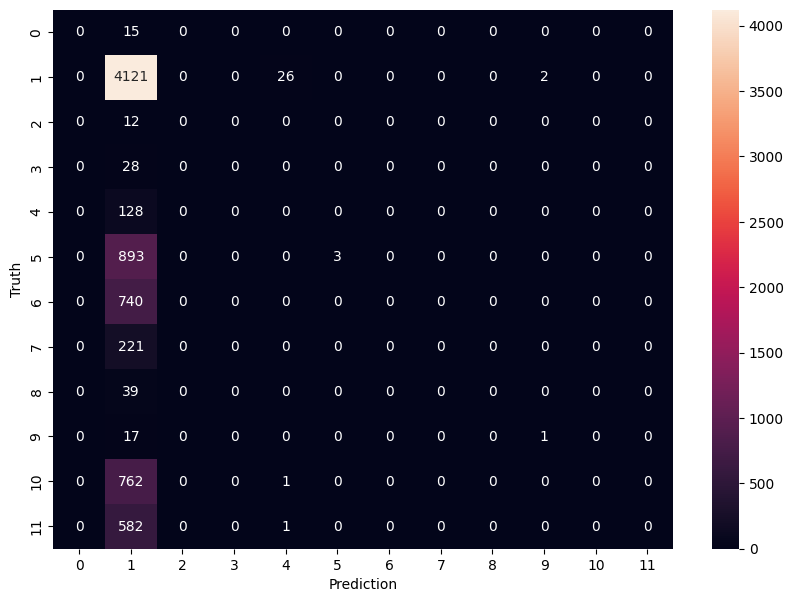

In [66]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')

<h1>Gensim Word Embeddings<h1>

In [68]:
import gensim.downloader as api
wv = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [69]:
def preprocess_and_vectorize(text):
    # remove stop words and lemmatize the text
    doc = word_vectors(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
        
    return wv.get_mean_vector(filtered_tokens)

In [70]:
df['gensin_vector'] = df['article_claim_phase1'].apply(lambda text: preprocess_and_vectorize(text))

In [71]:
df.head()

,fact_rating_phase1,article_claim_phase1,categorical_label,integer_label,vector,gensin_vector
0,true,"In June 2018, Oregon DOT employee Lori McAllen...",true,10,"[-2.8041418, -0.66138226, -1.338255, 1.4012051...","[0.004097297, -0.028004069, -0.011865532, 0.03..."
1,true,"In June 2018, Oregon DOT employee Lori McAllen...",true,10,"[-2.8041418, -0.66138226, -1.338255, 1.4012051...","[0.004097297, -0.028004069, -0.011865532, 0.03..."
2,true,"In June 2018, Oregon DOT employee Lori McAllen...",true,10,"[-2.8041418, -0.66138226, -1.338255, 1.4012051...","[0.004097297, -0.028004069, -0.011865532, 0.03..."
3,true,"In June 2018, Oregon DOT employee Lori McAllen...",true,10,"[-2.8041418, -0.66138226, -1.338255, 1.4012051...","[0.004097297, -0.028004069, -0.011865532, 0.03..."
4,true,"In June 2018, Oregon DOT employee Lori McAllen...",true,10,"[-2.8041418, -0.66138226, -1.338255, 1.4012051...","[0.004097297, -0.028004069, -0.011865532, 0.03..."


In [72]:
X_train, X_test, y_train, y_test = train_test_split(
    df.gensin_vector.values, 
    df.integer_label, 
    test_size=0.2, # 20% samples will go to test dataset
    random_state=20,
    stratify=df.integer_label
)

In [73]:
print("Shape of X_train before reshaping: ", X_train.shape)
print("Shape of X_test before reshaping: ", X_test.shape)


X_train_2d = np.stack(X_train)
X_test_2d =  np.stack(X_test)

print("Shape of X_train after reshaping: ", X_train_2d.shape)
print("Shape of X_test after reshaping: ", X_test_2d.shape)

Shape of X_train before reshaping:  (30365,)
Shape of X_test before reshaping:  (7592,)
Shape of X_train after reshaping:  (30365, 300)
Shape of X_test after reshaping:  (7592, 300)


In [74]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

#1. creating a GradientBoosting model object
clf = GradientBoostingClassifier()

#2. fit with all_train_embeddings and y_train
clf.fit(X_train_2d, y_train)


#3. get the predictions for all_test_embeddings and store it in y_pred
y_pred = clf.predict(X_test_2d)


#4. print the classfication report
print(classification_report(y_test, y_pred))

KeyboardInterrupt: ignored

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')